In [1]:
import numpy as np

In [32]:
def uniform_fibonacci(n_nodes, verbose=True):
    """
    Creates a uniform sampling pattern using a Fibonacci spiral
    """
    print('Using uniform fibonacci')
    g_ratio = (np.sqrt(5)+1) / 2
    theta = np.pi * 2 * g_ratio * np.arange(1, n_nodes+1)
    
    # For uniform sampling, we use a linear spacing for the radius
    r = np.linspace(0, 1, n_nodes)
    
    sort_idx = np.argsort(theta)
    theta = theta[sort_idx]
    r = r[sort_idx]
    
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y

In [33]:
import matplotlib.pyplot as plt

In [39]:
# 112**2, 28**2, 14**2, 7**2, 7**2
x, y = uniform_fibonacci(320)

Using uniform fibonacci


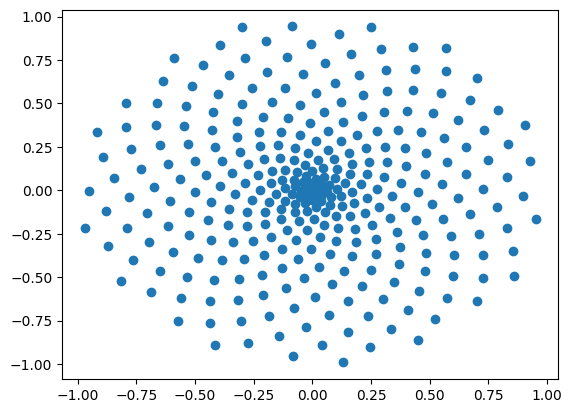

In [40]:
plt.scatter(x, y)

plt.show()

In [36]:
def log_fibonacci(n_nodes, fovea_radius, fovea_density, auto=False, verbose=True):

    g_ratio = (np.sqrt(5)+1) / 2
    theta = np.pi * 2 * g_ratio * np.arange(1, n_nodes+1)

    n_f_nodes = int(n_nodes * fovea_density)
    n_p_nodes = n_nodes - n_f_nodes

    f_nodes = np.sqrt(np.linspace(1, n_f_nodes, n_f_nodes) -0.5) * np.sqrt(n_f_nodes) 
    p_nodes = np.geomspace(n_f_nodes, n_f_nodes//fovea_radius, n_p_nodes) 


    f_res = f_nodes[-1] - f_nodes[-2]
    p_res = p_nodes[1] - p_nodes[0]

    if auto and f_res > p_res:
        return log_fibonacci(n_nodes, fovea_radius, fovea_density+0.01, auto)

    if verbose:
        fovea_area = len(f_nodes)
        full_res_area = (1/fovea_radius) ** 2 * fovea_area
        square_area = int(np.sqrt(np.pi) * full_res_area)
        print("Fovea Resolution equivalent to {res}x{res} pixel image".format(res=int(np.sqrt(square_area))))

    r = np.concatenate((f_nodes, p_nodes))
    r = r / r.max()

    sort_idx = np.argsort(theta)
    theta = theta[sort_idx]
    r = r[sort_idx]

    x = r * np.cos(theta)
    y = r * np.sin(theta) 
    return x, y

In [37]:
# dim, radius, 0.05, True, True
# dim: 112**2, 28**2, 14**2, 7**2, 7**2
# radius: 0.4
x, y = log_fibonacci(320, 0.4, 0.05, True, True)

Fovea Resolution equivalent to 35x35 pixel image


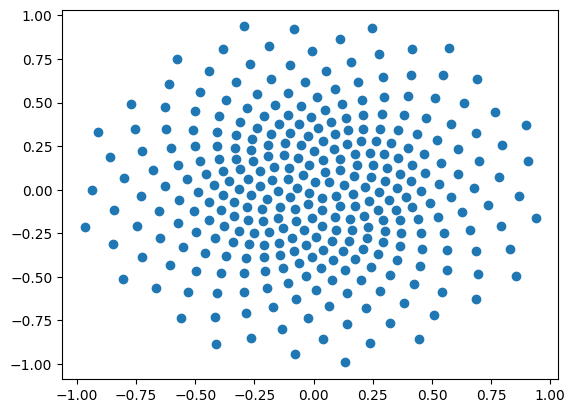

In [38]:
plt.scatter(x, y)

plt.show()